IMPORT DEPENDENCIES

In [1]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
import pandas as pd
import momepy as mp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import shapely.geometry as geom
from collections import Counter

In [2]:
place_name = "Manhattan Island, New York, United States"
G = ox.graph_from_place(place_name, network_type= 'drive', simplify = True)

In [3]:
area = ox.geocode_to_gdf(place_name)

In [4]:
#Load eviction data and filter data for Manhattan only
eviction_data = open(r"C:\Users\jfoo\Desktop\MACAD\03_AIA\01_GRAPHML\AIA-GML-James-Andres\Data\Evictions_20240516.csv")
eviction_df = pd.read_csv(eviction_data)
manhattan_evictions = eviction_df[eviction_df['BOROUGH'] == 'MANHATTAN']
clean_evictions = manhattan_evictions.dropna(subset = 'Latitude')

In [5]:
geometry = gpd.points_from_xy(clean_evictions['Longitude'], clean_evictions['Latitude'])
manhattan_evictions_gdf = gpd.GeoDataFrame(clean_evictions, geometry= geometry)
manhattan_evictions_gdf.set_crs(epsg= 4326)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
3,74670/16,61667,535 WEST 110TH STREE T,3A,05/04/2017,Justin,Grossman,Residential,MANHATTAN,10025,...,Possession,40.803795,-73.965797,9.0,7.0,199.0,1056904.0,1.018820e+09,Morningside Heights,POINT (-73.96580 40.80380)
10,311118/22,6085,2915 FREDERICK DOUGLASS BLVD,4C,03/05/2024,David,Smith,Residential,MANHATTAN,10039,...,Possession,40.828736,-73.937611,10.0,9.0,23502.0,1060897.0,1.020470e+09,Central Harlem North-Polo Grounds,POINT (-73.93761 40.82874)
14,59878/19,18419,620 WEST 172ND STREE T,4A,08/13/2019,George,"Essock, Jr.",Residential,MANHATTAN,10032,...,Possession,40.844060,-73.939327,12.0,10.0,253.0,1063486.0,1.021420e+09,Washington Heights South,POINT (-73.93933 40.84406)
36,82266/16,9013,220 CABRINI BLVD,3D,01/30/2018,George,"Essock, Jr.",Residential,MANHATTAN,10033,...,Possession,40.854901,-73.938490,12.0,10.0,275.0,1064369.0,1.021790e+09,Washington Heights North,POINT (-73.93849 40.85490)
39,N60311/19,97948,267 WEST 146TH STREE T,16,10/03/2019,Ileana,Rivera,Residential,MANHATTAN,10039,...,Possession,40.823075,-73.940380,10.0,9.0,234.0,1060499.0,1.020320e+09,Central Harlem North-Polo Grounds,POINT (-73.94038 40.82308)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91169,21087/18,34034,442 EAST 105TH ST,05B,05/07/2019,Bruce,Kemp,Residential,MANHATTAN,10029,...,Eviction,40.788265,-73.938952,11.0,8.0,162.0,1083950.0,1.016960e+09,East Harlem South,POINT (-73.93895 40.78827)
91195,080658/17,80051,106-108 WEST 109TH ST,3C,03/02/2018,Henry,Daley,Residential,MANHATTAN,10025,...,Possession,40.801398,-73.962010,7.0,7.0,193.0,1056007.0,1.018630e+09,Morningside Heights,POINT (-73.96201 40.80140)
91196,65769/19,357421,243 EAST 83RD STREET,5C,12/12/2019,Thomas,Bia,Residential,MANHATTAN,10028,...,Possession,40.776451,-73.954395,8.0,5.0,138.0,1048703.0,1.015290e+09,Yorkville,POINT (-73.95440 40.77645)
91197,65769/19,357421,243 EAST 83RD STREET,5C,12/12/2019,Thomas,Bia,Residential,MANHATTAN,10028,...,Possession,40.776451,-73.954395,8.0,5.0,138.0,1048703.0,1.015290e+09,Yorkville,POINT (-73.95440 40.77645)


In [6]:
eviction_gdf_points = manhattan_evictions_gdf[manhattan_evictions_gdf['geometry'].type == 'Point']
eviction_gdf_points.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
3,74670/16,61667,535 WEST 110TH STREE T,3A,05/04/2017,Justin,Grossman,Residential,MANHATTAN,10025,...,Possession,40.803795,-73.965797,9.0,7.0,199.0,1056904.0,1.018820e+09,Morningside Heights,POINT (-73.96580 40.80380)
10,311118/22,6085,2915 FREDERICK DOUGLASS BLVD,4C,03/05/2024,David,Smith,Residential,MANHATTAN,10039,...,Possession,40.828736,-73.937611,10.0,9.0,23502.0,1060897.0,1.020470e+09,Central Harlem North-Polo Grounds,POINT (-73.93761 40.82874)
14,59878/19,18419,620 WEST 172ND STREE T,4A,08/13/2019,George,"Essock, Jr.",Residential,MANHATTAN,10032,...,Possession,40.844060,-73.939327,12.0,10.0,253.0,1063486.0,1.021420e+09,Washington Heights South,POINT (-73.93933 40.84406)
36,82266/16,9013,220 CABRINI BLVD,3D,01/30/2018,George,"Essock, Jr.",Residential,MANHATTAN,10033,...,Possession,40.854901,-73.938490,12.0,10.0,275.0,1064369.0,1.021790e+09,Washington Heights North,POINT (-73.93849 40.85490)
39,N60311/19,97948,267 WEST 146TH STREE T,16,10/03/2019,Ileana,Rivera,Residential,MANHATTAN,10039,...,Possession,40.823075,-73.940380,10.0,9.0,234.0,1060499.0,1.020320e+09,Central Harlem North-Polo Grounds,POINT (-73.94038 40.82308)


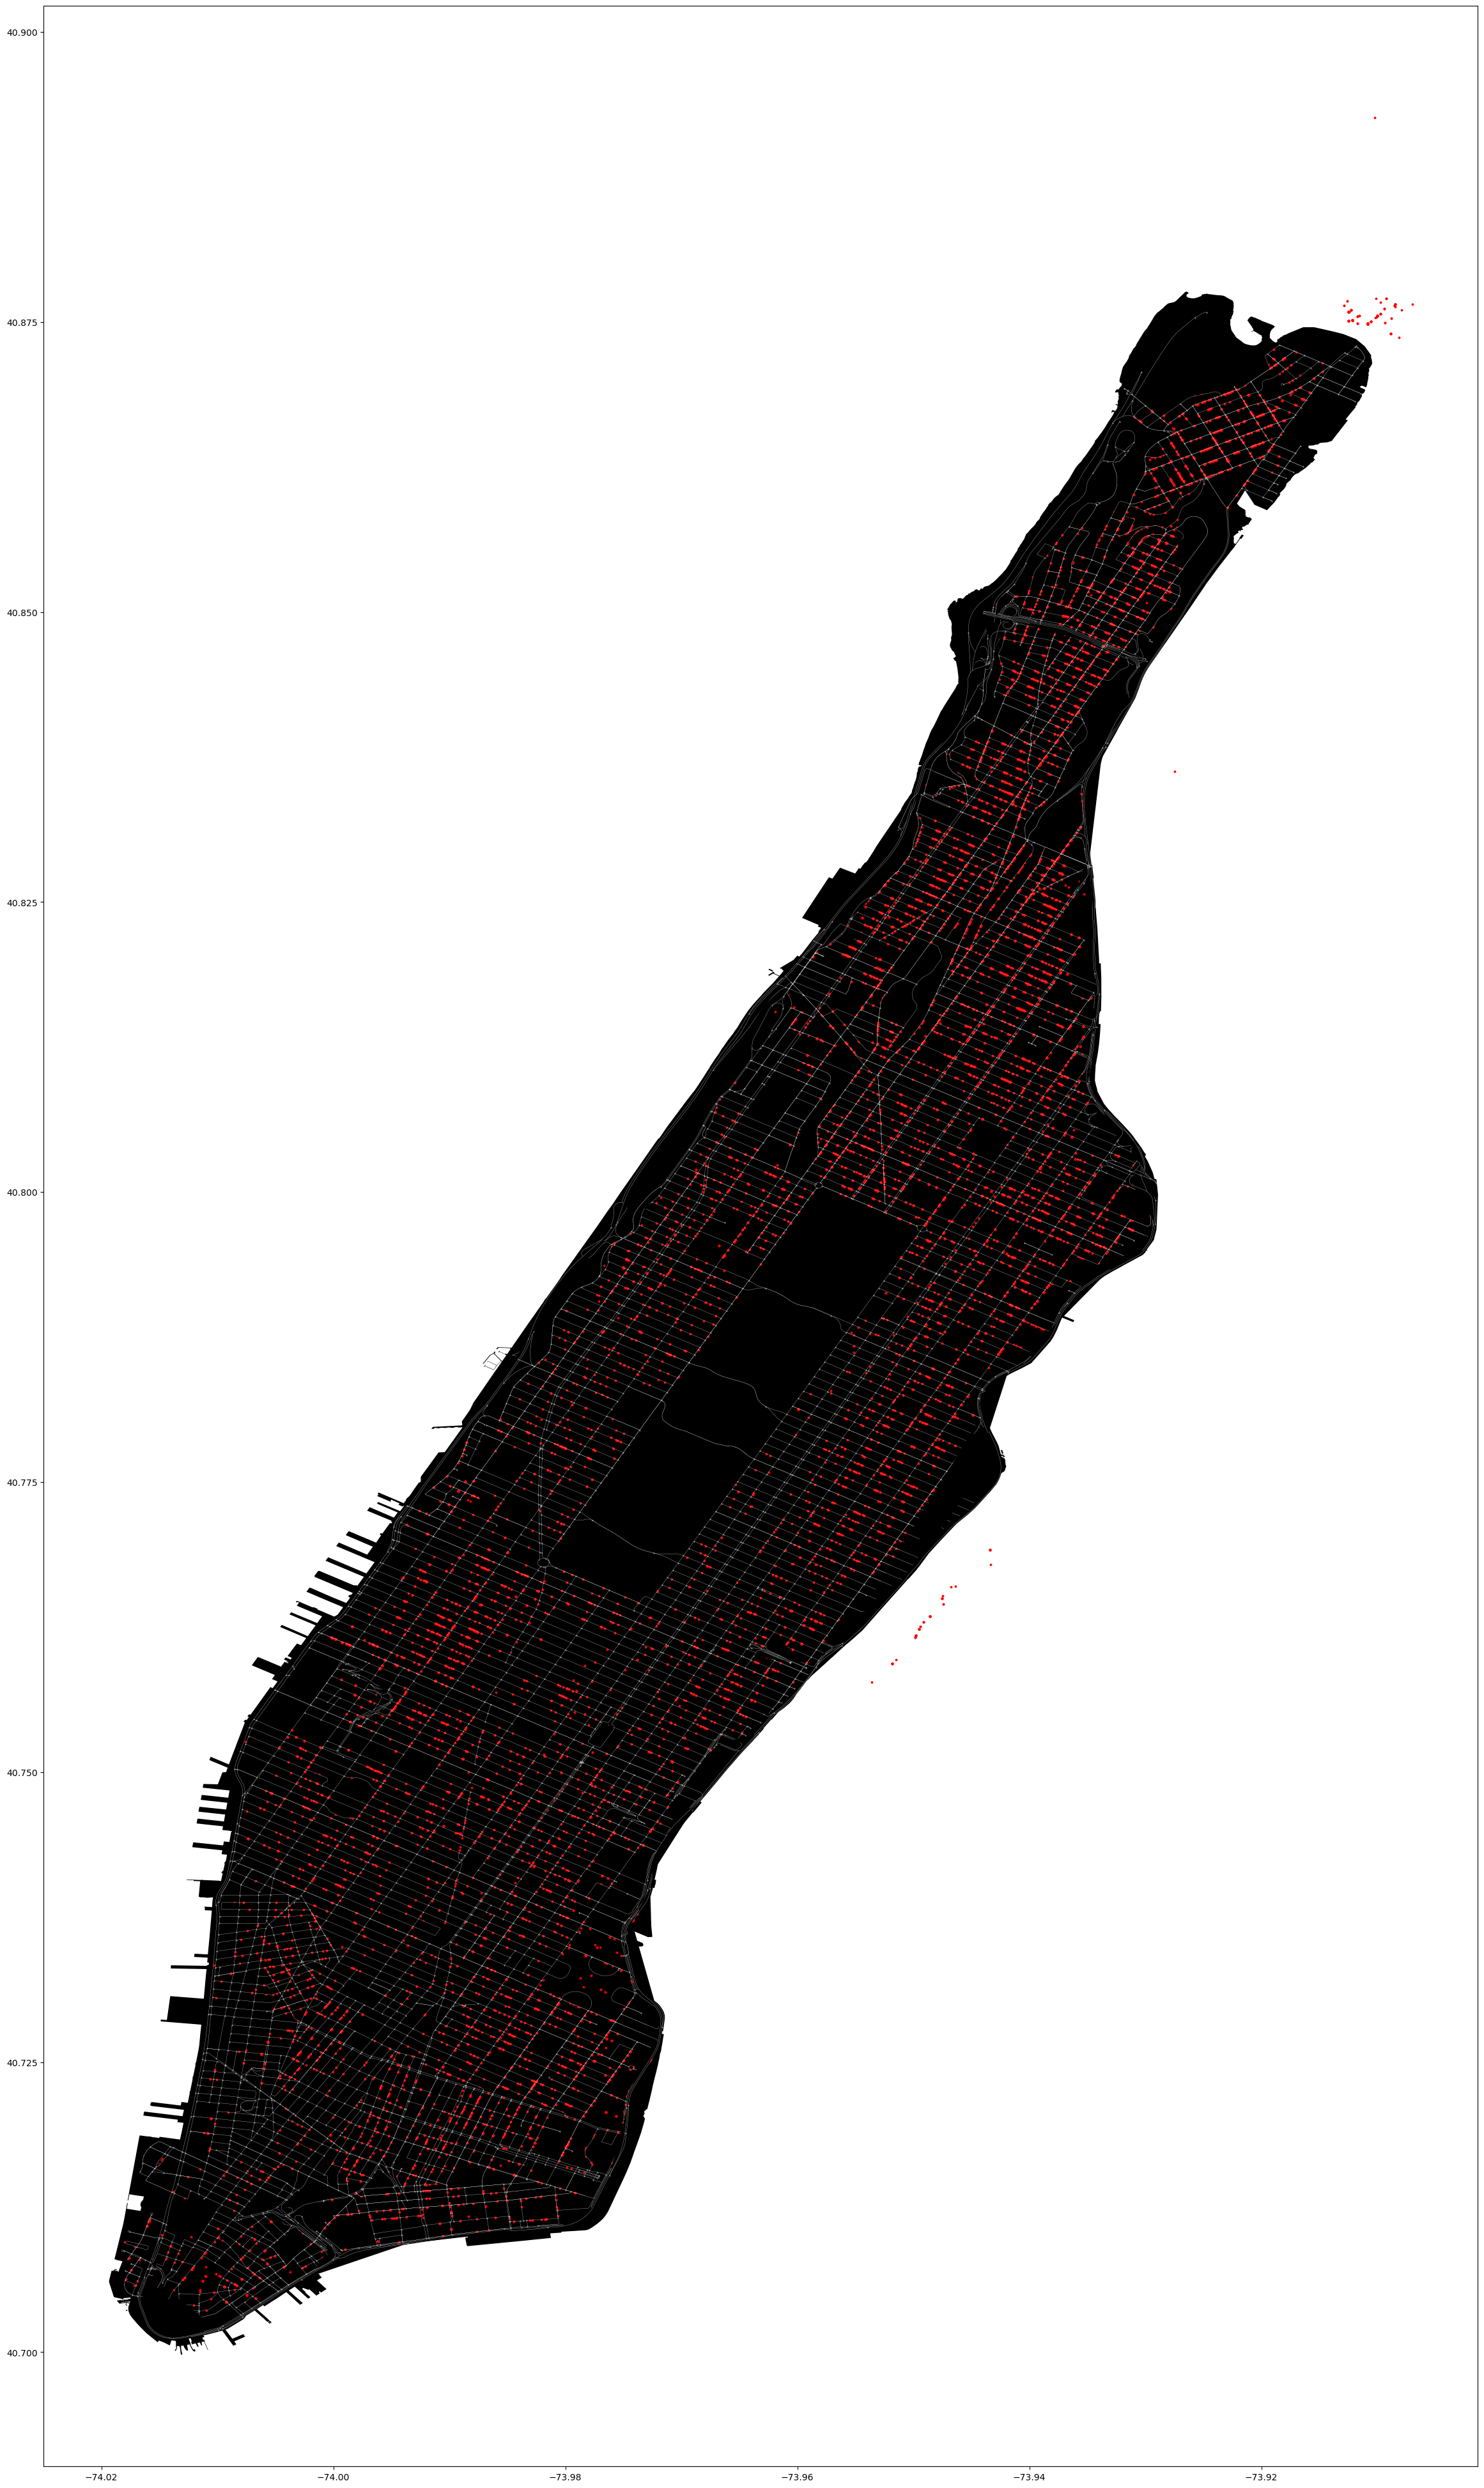

<Figure size 640x480 with 0 Axes>

In [7]:
nodes, edges = ox.graph_to_gdfs(G)
fig, ax = plt.subplots(figsize=(30,50))
area.plot(ax = ax, facecolor = 'black')
edges.plot(ax = ax, linewidth = 0.2, edgecolor = 'white', facecolor = 'black')
nodes.plot(ax= ax, color = 'white', markersize = .1)
eviction_gdf_points.plot(ax= ax, markersize = 3, color = 'red')

plt.show()
plt.savefig('Evictions.png', dpi = 300)

In [8]:
close_edges = ox.distance.nearest_edges(G, eviction_gdf_points['geometry'].x, eviction_gdf_points['geometry'].y)
eviction_count = Counter(close_edges)

In [9]:
evictions = []

for i in edges.index:
    eviction = eviction_count[edges.loc[i].name]
    evictions.append(eviction)

max(evictions)

110

(array([9.432e+03, 2.280e+02, 2.500e+01, 9.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.,  11.,  22.,  33.,  44.,  55.,  66.,  77.,  88.,  99., 110.]),
 <BarContainer object of 10 artists>)

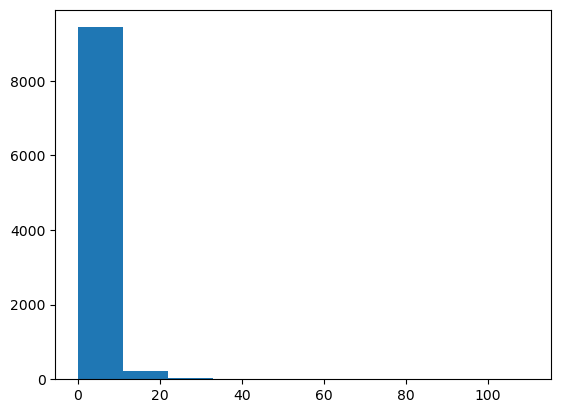

In [10]:
high_evictions = [30 if x > 30 else x for x in evictions]
plt.hist(evictions)

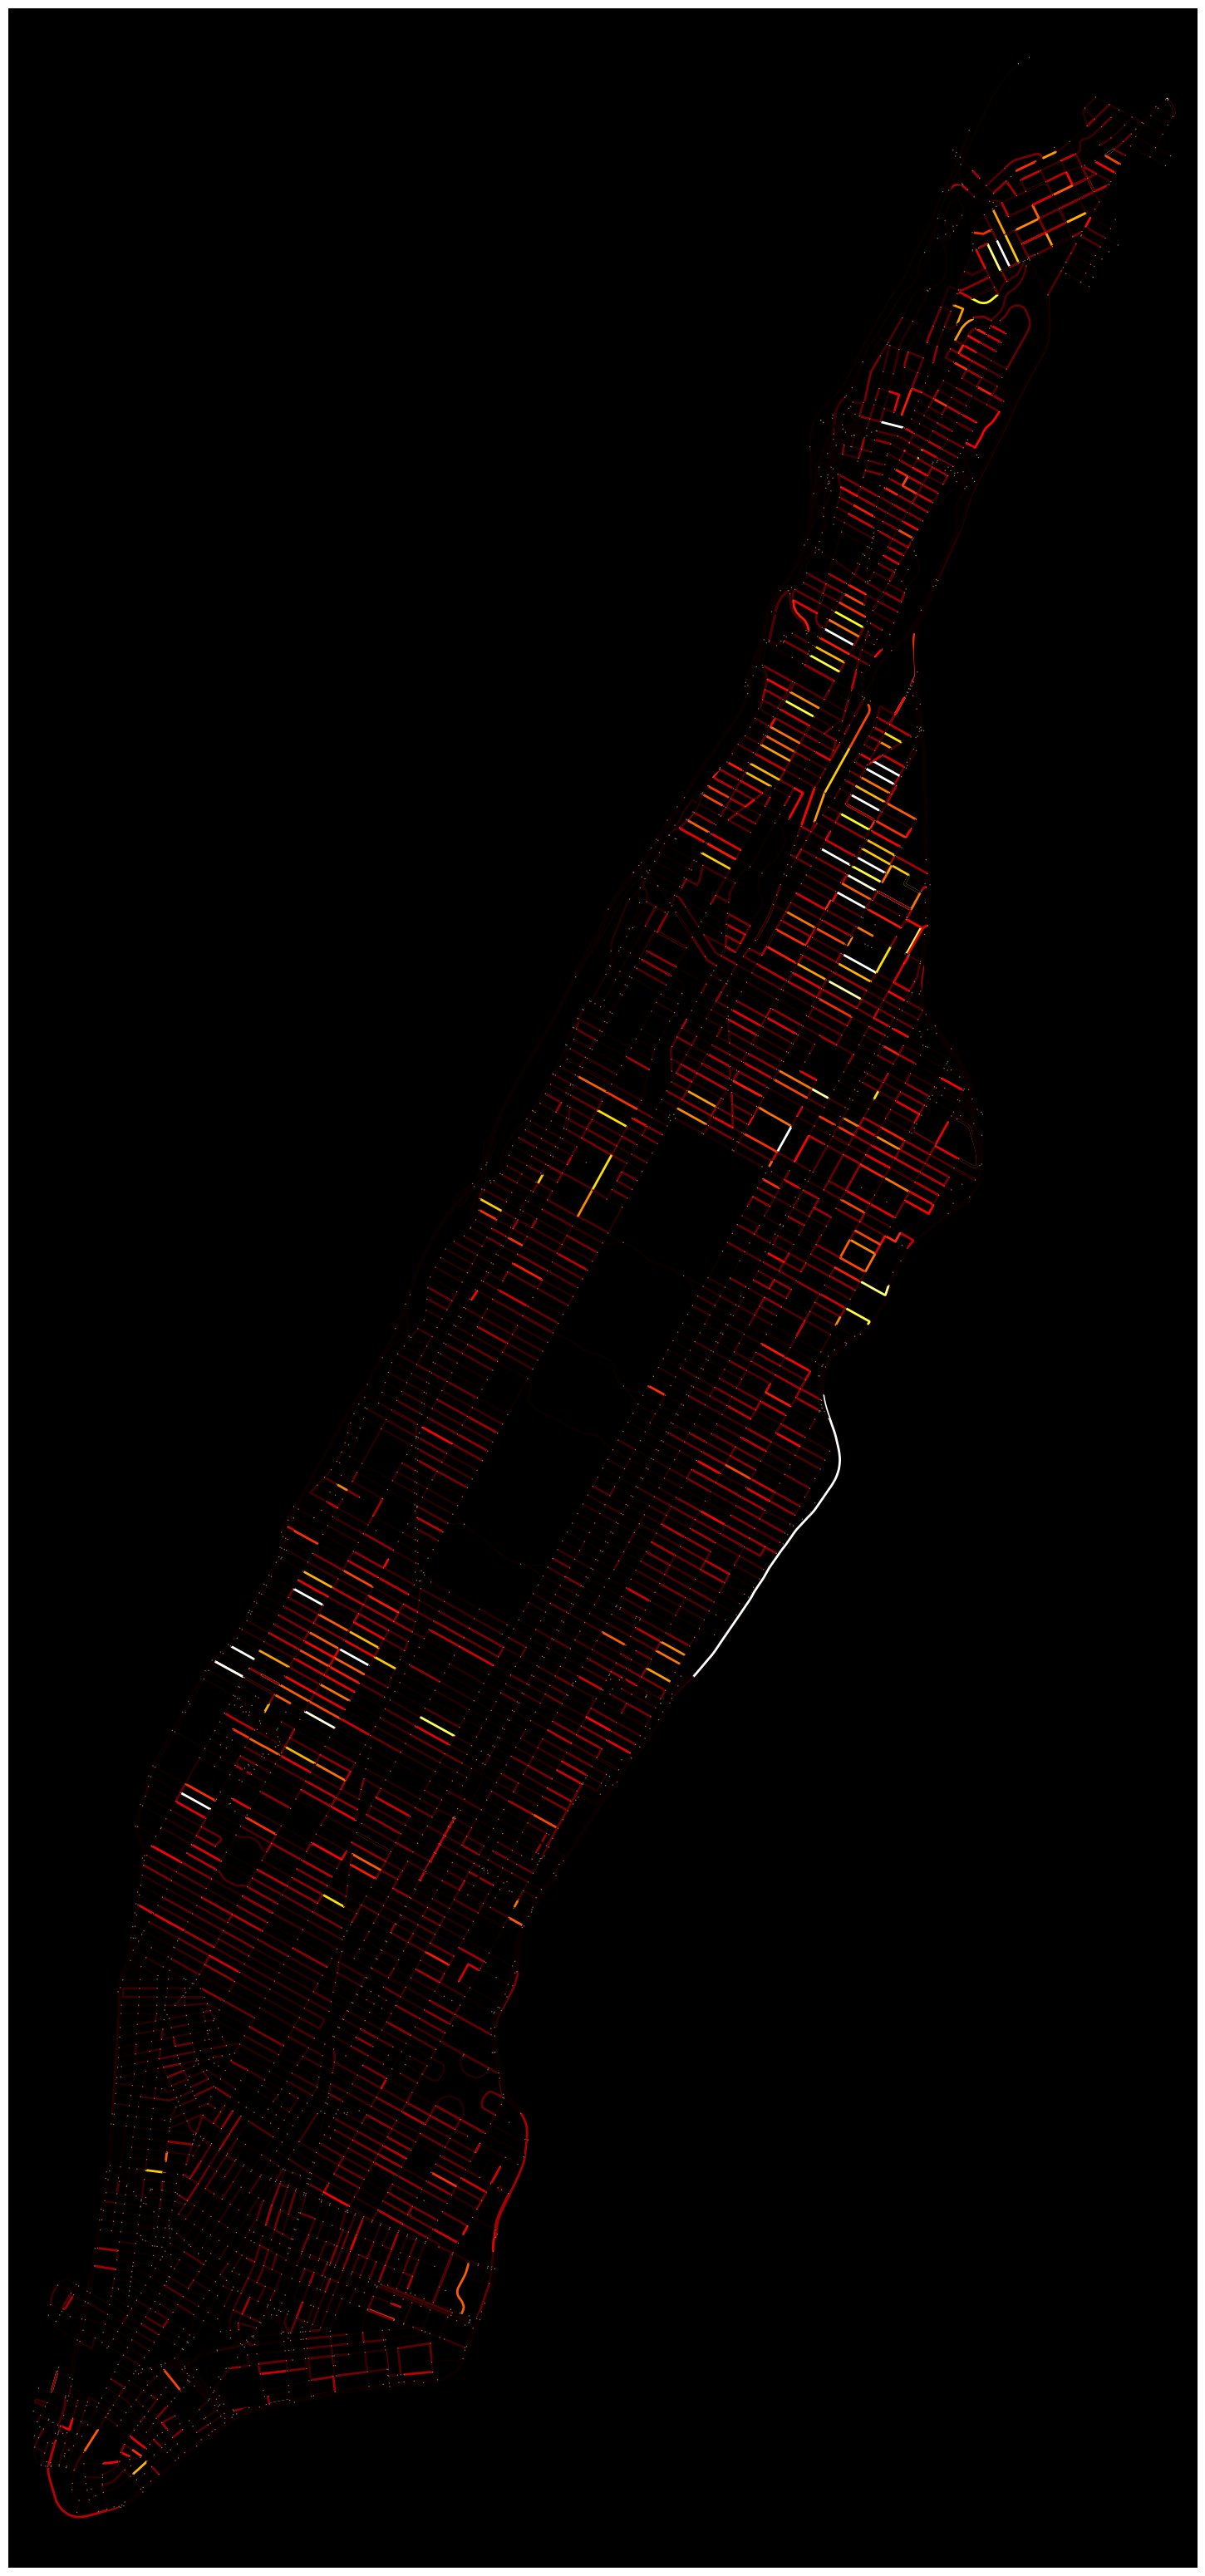

In [11]:
edges['evictions'] = high_evictions

G_evictions = ox.graph_from_gdfs(nodes, edges)
ec = ox.plot.get_edge_colors_by_attr(G_evictions, attr = 'evictions', cmap= 'hot')

fig, ax = ox.plot_graph(G, node_size=1, node_color = 'grey', edge_color=ec, edge_linewidth=2, figsize=(30,40), edge_alpha=1, bgcolor='black')

In [ ]:
# #Create plot for edges
# edge_trace = go.Scatter(
# x=[],
# y=[],
# line = dict(width = .5, color = 'white'),
# hoverinfo= 'none',
# mode='lines'
# )

# #Add values to edges
# for line in edges['geometry']:
#     x0, y0 = line.coords[0]
#     x1, y1 = line.coords[1]
#     edge_trace['x'] += tuple([x0, x1, None])
#     edge_trace['y'] += tuple([y0, y1, None])

# #Create fig for nodes
# node_trace = go.Scatter(
# x=[],
# y=[],
# text=[],
# mode='markers',
# hoverinfo='Eviction Site',
# marker = dict(
#     showscale = True,
#     colorscale = 'white',
#     reversecale = 'True',
#     color = [],
#     colorbar = dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
#         line_width = 2)
# )


# for node in nodes():
#     x, y = node['geometry'][0], node['geometry'][1]
#     node_trace['x']+= tuple([x])
#     node_trace['y']+= tuple([y])


# fig = go.Figure(data=[edge_trace, node_trace],
#                 layout=go.Layout(
#                     title='<br>Network graph made with Plotly',
#                     titlefont_size=16,
#                     showlegend=False,
#                     hovermode='closest',
#                     margin=dict(b=20, l=5, r=5, t=40),
#                     annotations=[dict(
#                         text="Python code: <a href='https://plotly.com/python/'>Plotly</a>",
#                         showarrow=False,
#                         xref="paper", yref="paper",
#                         x=0.005, y=-0.002)],
#                     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
